# Image selector

This notebook goes through the images in a folder, displays the image and asks is the user wants to keep it or not. If the user does want to keep it, the image is copied to a new folder that collects the kept images, if not nothing is done. After each selection, the next image is displayed. 

In [9]:
# This notebook goes through the images in a folder, displays the image 
# and asks is the user wants to keep it or not. 
# If the user does want to keep it, the image is copied to a new folder 
# that collects the kept images, if not nothing is done. 
# After each selection, the next image is displayed. 

In [20]:
import os
from pathlib import Path

import shutil
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [24]:
#category = 'bee'
category = 'wasp'
# category = 'other_insect'
# category = 'other_noinsect'

raw_data_path = Path('data/bee_vs_wasp/')
filtered_data_path = Path('data/bee_vs_wasp_reduced/')

folder = raw_data_path / category
keep_images_folder = filtered_data_path / category


In [25]:
# Check if filtered path exists

if keep_images_folder.exists():
    num_files = sum(1 for f in keep_images_folder.iterdir() if f.is_file())
    last_file = sorted(keep_images_folder.iterdir())[-1]
    
    print(f"{keep_images_folder} already has {num_files} files.")
    print(f"Image selection will start after {last_file}.")
    print("Delete the folder if you want to start from scratch.")
else:
    # Create the keep_images_folder if it doesn't exist
    os.makedirs(keep_images_folder, exist_ok=True) 
                

data/bee_vs_wasp_reduced/wasp already has 252 files.
Image selection will start after data/bee_vs_wasp_reduced/wasp/W00510.jpg.
Delete the folder if you want to start from scratch.


Image 4943 of 4943: data/bee_vs_wasp/wasp/image.png


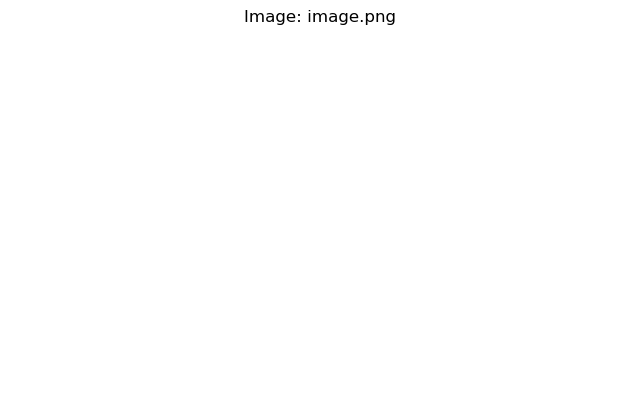

Keep this image? (y/n) or 'q' to quit:  n


✗ Skipped: image.png


In [26]:

# Get list of image files
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff']
image_files = [f for f in sorted(folder.iterdir()) if f.is_file() and f.suffix in image_extensions]

print(f"Found {len(image_files)} images in {raw_data_path}")

# Function to display image and get user choice
def process_images(start_after):

    start_file_reached=False
    
    for i, filename in enumerate(image_files):
        if not start_file_reached:
            if filename.name == start_after.name:
                print(f"Starting processing after {start_after}")
                start_file_reached=True
            else:
                continue
        else:
        
            clear_output(wait=True)

            # Display current progress
            print(f"Image {i+1} of {len(image_files)}: {filename}")

            # Load and display the image
            img = Image.open(filename)

            plt.figure(figsize=(8, 6))
            plt.imshow(img)
            plt.title(f"Image: {filename.name}")
            plt.axis('off')
            plt.show()

            # Ask user for decision
            while True:
                choice = input("Keep this image? (y/n) or 'q' to quit: ").lower().strip()
                if choice in ['y', 'yes']:
                    # Copy image to keep folder
                    dest_path = filtered_data_path / filename.name
                    shutil.copy2(filename, dest_path)
                    print(f"✓ Kept: {filename.name}")
                    break
                elif choice in ['n', 'no']:
                    print(f"✗ Skipped: {filename.name}")
                    break
                elif choice == 'q':
                    print("Quitting...")
                    return
                else:
                    print("Please enter 'y' for yes, 'n' for no, or 'q' to quit")


# Start processing
process_images(last_file)